# Support Vector Machine Classifiers 

Support Vector Machine Models, including evaluation statistics.  

### Preprocessing

#### Import Dependencies

In [1]:
#Packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm 

#Geoff's Preprocessor 
from x_ray import preprocessor 

#### Define Static Variables 

In [2]:
#Define directories for CSV and image folder
csv_path = 'C:/Users/stany/Desktop/project-data-repo/x_ray_1000.csv'
image_path = 'C:/Users/stany/Desktop/project-data-repo/x_ray_1000_images'

#### Helper Functions

In [10]:
def model_preprocess(csv_path, image_path, input_labels):
    #Model Specific Preprocessing  
    prepper = preprocessor(csv_path, image_path, 100, 100, input_labels)
    #save training, validation, and testing datasets to X_train, X_val, X_test, y_train, y_val, y_test
    return prepper.prepare_x_ray_data()
    
def model_train(X_train, y_train, kernel='linear'): 
    #Trains model and returns predictions
   
    #Create an instance of the RFC
    classifier=svm.SVC(kernel=kernel) #Note, n_estimators is the number of trees
    #Train the model using the training set, X_train, y_train 
    classifier.fit(X_train,y_train) 
    #Save the predictions 
    y_pred = classifier.predict(X_test)
    #Save to y_pred
    return y_pred
    
    
def model_classification_metrics(y_test, y_pred, average=None): 
    #Print Model Accuracy, how often is the classifier correct? 
    print("\nClassification Metrics:")
    print("--------------------------------------------------------")
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

    #Other classification metrics
    #print("Error Score:",1-metrics.accuracy_score(y_test,y_pred))
    print("Precision:",metrics.precision_score(y_test,y_pred, average = average))
    print("Recall:",metrics.recall_score(y_test,y_pred, average = average))
    print("F1 Score:",metrics.f1_score(y_test,y_pred, average = average))
    print("--------------------------------------------------------")
    
def model_confusion_matrix(y_test, y_pred,include_title=False): 
    #Create Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt=".2f", linewidths=0.5, square = False, cmap = 'Blues_r', xticklabels=True,yticklabels=True)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    if include_title==True:
        plt.title('Confusion Matrix', size = 15)
    
def model_rocCurve_aucStat(y_test, y_pred, label): 
    #Binarize the data
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    #Create ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr) #AUC Statistic
    print("ROC Curve:")
    plt.figure()
    lw = 2
    #label example: 'ROC No Finding v. Cardiomegaly (area = %0.2f)'
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label=label % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #plt.title('Receiver Operating Characteristic: No Finding vs. Cardiomegaly')
    plt.legend(loc="lower right")
    plt.show()

    #AUC Score 
    print("AUC Score:", roc_auc_score(y_test, y_pred, average="macro"))
    
def multiclass_roc_auc_score(y_test, y_pred, average="macro"): 
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test) 
    y_pred = lb.transform(y_pred) 
    return roc_auc_score(y_test, y_pred, average=average)

def multiclass_roc(y_test, y_pred, average="macro"): 
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in tqdm(range(10)):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc

def multiclass_roc_curve(fpr,tpr, roc_auc): 
    plt.figure() 
    lw = 2 
    colors = ['darkorange', 'cyan', 'red', 'pink', 'green', 'yellow', 'indigo', 'blue', 'skyblue', 'forestgreen']
    labels = ['ROC 0 (area = %0.2f)','ROC 1 (area = %0.2f)','ROC 2 (area = %0.2f)',
             'ROC 3 (area = %0.2f)','ROC 4 (area = %0.2f)','ROC 5 (area = %0.2f)',
              'ROC 6 (area = %0.2f)','ROC 7 (area = %0.2f)','ROC 8 (area = %0.2f)',
             'ROC 9 (area = %0.2f)']
    for i in tqdm(range(0,len(fpr))):
        plt.plot(fpr[i],tpr[i],color=colors[i],lw=lw,label=labels[i] % roc_auc[i])
    plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

### Multiclassification Support Vector Machine

#### Model Specific Preprocessing

In [4]:
#Define labels for model 
input_labels = ['Atelectasis','Cardiomegaly','Consolidation','Effusion','Infiltration','Mass',
               'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumothorax']

X_train, X_val, X_test, y_train, y_val, y_test = model_preprocess(csv_path, image_path, input_labels)

Assigning numerical Finding Labels to Finding IDs...
Creating a data frame of the flat image matrics & associated labels and then shuffling...


#### Train the Model

In [5]:
#Train the model, save predictions
y_pred = model_train(X_train, y_train)

#### Evaluate the Model 

100%|██████████| 10/10 [00:00<00:00, 417.08it/s]


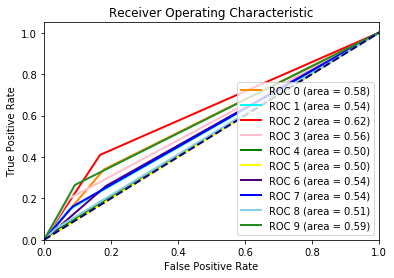

AUC Score: 0.5475


In [11]:
#Create ROC Curve, print AUC statistic
fpr, tpr, roc_auc = multiclass_roc(y_test, y_pred, average='macro')
multiclass_roc_curve(fpr, tpr, roc_auc)
print("AUC Score:", multiclass_roc_auc_score(y_test, y_pred, average="macro"))


Classification Metrics:
--------------------------------------------------------
Accuracy: 0.1855
Precision: 0.179145697115
Recall: 0.1855
F1 Score: 0.159922465239
--------------------------------------------------------


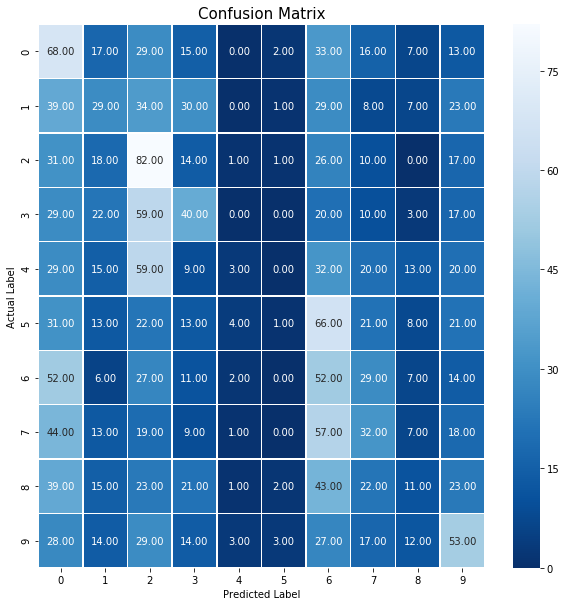

In [12]:
#Print classification metrics
model_classification_metrics(y_test,y_pred,average='macro') #micro?  

#Create Confusion Matrix
model_confusion_matrix(y_test, y_pred,include_title=True)